In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
from ydata_profiling import ProfileReport

# Data Collection

In [2]:
ukairbnb_df=pd.read_csv('londonairbnb_listings.csv',index_col=0)

C:\Users\Probook\AppData\Local\Temp\ipykernel_25764\689985211.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  ukairbnb_df=pd.read_csv('londonairbnb_listings.csv',index_col=0)


In [3]:
ukairbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 87946 entries, 92644.0 to 9.73896e+17
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       87946 non-null  object 
 1   description                86679 non-null  object 
 2   host_id                    87946 non-null  int64  
 3   host_name                  87941 non-null  object 
 4   host_since                 87941 non-null  object 
 5   host_location              69168 non-null  object 
 6   host_response_time         59028 non-null  object 
 7   host_response_rate         59028 non-null  object 
 8   host_acceptance_rate       62758 non-null  object 
 9   host_is_superhost          87014 non-null  object 
 10  host_neighbourhood         48079 non-null  object 
 11  host_listings_count        87941 non-null  float64
 12  host_total_listings_count  87941 non-null  float64
 13  host_verifications         87946

In [4]:
ukairbnb_df.head()

name  \
id                                                           
92644.0  Rental unit in Earlsfield · ★4.57 · 1 bedroom ...   
93015.0  Rental unit in Hammersmith · ★4.82 · 2 bedroom...   
13913.0  Rental unit in Islington · ★4.80 · 1 bedroom ·...   
15400.0  Rental unit in London · ★4.80 · 1 bedroom · 1 ...   
93734.0  Condo in London · ★4.62 · 1 bedroom · 1 bed · ...   

                                               description  host_id host_name  \
id                                                                              
92644.0  <b>The space</b><br />Hi everyone! I have 2 ro...   498201   Dee Dee   
93015.0  Gorgeous 2 bed ground floor apartment with per...   499704     Sarah   
13913.0  My bright double bedroom with a large window h...    54730     Alina   
15400.0  Lots of windows and light.  St Luke's Gardens ...    60302  Philippa   
93734.0  <b>During your stay</b><br />I’m a professiona...   497514   William   

         host_since                                      host_location  \
id                                                                       
92644.0  10/04/2011                             London, United Kingdom   
93015.0  11/04/2011                             London, United Kingdom   
13913.0  16/11/2009                             London, United Kingdom   
15400.0  05/12/2009  Royal Borough of Kensington and Chelsea, Unite...   
93734.0  10/04/2011                             London, United Kingdom   

         host_response_time host_response_rate host_acceptance_rate  \
id                                                                    
92644.0                 NaN                NaN                 100%   
93015.0  within a few hours               100%                  25%   
13913.0  within a few hours               100%                  88%   
15400.0        within a day               100%                  41%   
93734.0  within a few hours                90%                  75%   

        host_is_superhost  ... availability_60  availability_90  \
id                         ...                                    
92644.0                 f  ...               0                0   
93015.0                 f  ...              18               38   
13913.0                 f  ...              55               85   
15400.0                 f  ...               7                7   
93734.0                 t  ...               5                5   

         availability_365 number_of_reviews first_review last_review  \
id                                                                     
92644.0               217               216   21/06/2011  29/10/2022   
93015.0                40                38   01/02/2012  30/09/2022   
13913.0               360                41   18/08/2010  11/12/2022   
15400.0                73                94   21/12/2009  01/05/2023   
93734.0               196               180   30/06/2011  02/09/2023   

        review_scores_value  license  instant_bookable reviews_per_month  
id                                                                        
92644.0                4.68      NaN                 t              1.45  
93015.0                4.74      NaN                 f              0.27  
13913.0                4.69      NaN                 f              0.26  
15400.0                4.74      NaN                 f              0.56  
93734.0                4.67      NaN                 f              1.21  

[5 rows x 41 columns]

$Initial Observation$

1. name column should be dropped along with other irrelevant columns
2. host_since,first_review, last_review should be converted to date type
3. handle NaN
4. Remove leading and trailing whitespaces from all columns
5. From the profile report, there are 87946 ROWS and 22 DUPLICATES with some null values which would be handled accordingly.
6. Price column would be transformed to remove the dollar sign and converted to float

# Data Cleaning

In [5]:
# Check the shape of the DataFrame
print(ukairbnb_df.shape)

(87946, 41)


In [6]:
# Remove "$" and any non-numeric characters and convert to float
ukairbnb_df['price'] = ukairbnb_df['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

# Also, I will change the type of data for last-review  and host_since from object to datetime.
ukairbnb_df['last_review'] = pd.to_datetime(ukairbnb_df['last_review'], format='%d/%m/%Y')
ukairbnb_df['host_since'] = pd.to_datetime(ukairbnb_df['host_since'], format='%d/%m/%Y')

In [7]:
# Remove leading and trailing whitespaces from all columns
ukairbnb_df = ukairbnb_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
# Define a list of relevant columns to keep
columns_to_keep = [
   'host_id', 'host_since', 'last_review', 'neighbourhood', 'room_type',
    'price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'review_scores_value',
    'host_is_superhost',  'host_listings_count',
    'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
    'host_identity_verified', 'property_type', 'accommodates', 'beds',
    'instant_bookable'
]
# Create a new DataFrame with only the relevant columns
ukairbnb_subdf = ukairbnb_df[columns_to_keep]

In [9]:
print(ukairbnb_subdf.shape)

(87946, 20)


In [10]:
# handling null
ukairbnb_subdf.isna().sum() / len(ukairbnb_subdf) *100

host_id                       0.000000
host_since                    0.005685
last_review                  25.195006
neighbourhood                 0.000000
room_type                     0.000000
price                         0.000000
minimum_nights                0.000000
availability_365              0.000000
number_of_reviews             0.000000
review_scores_value          26.295681
host_is_superhost             1.059741
host_listings_count           0.005685
host_total_listings_count     0.005685
host_verifications            0.000000
host_has_profile_pic          0.005685
host_identity_verified        0.005685
property_type                 0.000000
accommodates                  0.000000
beds                          1.289428
instant_bookable              0.000000
dtype: float64

*host_since, host_listings_count,host_has_profile_pic,host_identity_verified and host_total_listings_count has the same pattern with the null values. hence these rows will be dropped as they are less than 1%(in total) of the dataset
likewise, host_is_superhost and beds. However, review_scores_values with almost 26% will be handled through the imputation technique*

In [11]:
# Drop rows with null values in specified columns
columns_to_check = ['host_since', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'host_total_listings_count', 'host_is_superhost', 'beds']
ukairbnb_subdf = ukairbnb_subdf.dropna(subset=columns_to_check)

#Imputation with Central Tendency Measures for review_scores_value 
median_value = ukairbnb_subdf['review_scores_value'].median()
ukairbnb_subdf['review_scores_value'].fillna(median_value, inplace=True)

#Imputation with Central Tendency Measures for last_review 
median_last_review = ukairbnb_subdf['last_review'].median()
ukairbnb_subdf['last_review'].fillna(median_last_review, inplace=True)

# Check the new shape of the DataFrame
print(ukairbnb_subdf.shape)

(85879, 20)


In [12]:
# checking null again
ukairbnb_subdf.isna().sum() / len(ukairbnb_subdf) *100

host_id                      0.0
host_since                   0.0
last_review                  0.0
neighbourhood                0.0
room_type                    0.0
price                        0.0
minimum_nights               0.0
availability_365             0.0
number_of_reviews            0.0
review_scores_value          0.0
host_is_superhost            0.0
host_listings_count          0.0
host_total_listings_count    0.0
host_verifications           0.0
host_has_profile_pic         0.0
host_identity_verified       0.0
property_type                0.0
accommodates                 0.0
beds                         0.0
instant_bookable             0.0
dtype: float64

In [13]:
# handling duplicates: 22 duplicates were found and would be dropped and re-indexed
ukairbnb_cleaned = ukairbnb_subdf.drop_duplicates()
ukairbnb_cleaned = ukairbnb_cleaned.reset_index(drop=True)

# Check the new shape of the DataFrame
print(ukairbnb_cleaned.shape)

(84967, 20)


In [14]:
#EDA profiling
lprofile = ProfileReport(ukairbnb_cleaned, title="London AirBnB Profiling Report")
lprofile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1. record ranges from 2008 Dec till September 2023  and price from 0 to 80100
2. A deeper view of this profiling suggests there might be presence of outliers

# Exploratory Analysis

**Key Objective: Uncover insights within the dataset**

## Data Exploration Business Task
Guiding Questions:

1. What can we learn from predictions? (ex. Locations, prices,reviews etc.)
2. Is there any noticeable difference among the areas and what could be the reason for it?
3. Which hosts are the busiest and why?
4. What can the different types of units or properties available tell us?

### Converting df to db for SQL scripting

In [42]:
import sqlite3
import pandasql as psql

In [43]:
# Creating a SQLite database connection
conn = sqlite3.connect('ukairbnb_cleaned.db')

# Saving DataFrame to the database
ukairbnb_cleaned.to_sql('ukairbnb_cleaned', conn, if_exists='replace', index=False)

84967

#### db statistics

In [17]:
ukairbnb_cleaned.describe()

host_id         price  minimum_nights  availability_365  \
count  8.496700e+04  84967.000000    84967.000000      84967.000000   
mean   1.584665e+08    172.972531        5.466616        120.344899   
std    1.700067e+08    480.070796       22.718811        134.407780   
min    4.775000e+03      0.000000        1.000000          0.000000   
25%    2.153396e+07     62.000000        1.000000          0.000000   
50%    7.890292e+07    110.000000        2.000000         63.000000   
75%    2.666963e+08    190.000000        4.000000        249.000000   
max    5.355140e+08  80100.000000     1125.000000        365.000000   

       number_of_reviews  review_scores_value  host_listings_count  \
count       84967.000000         84967.000000         84967.000000   
mean           18.132039             4.630963            29.807278   
std            43.128065             0.468610           185.855841   
min             0.000000             0.000000             1.000000   
25%             1.000000             4.580000             1.000000   
50%             4.000000             4.740000             2.000000   
75%            16.000000             4.860000             6.000000   
max          1536.000000             5.000000          3023.000000   

       host_total_listings_count  accommodates          beds  
count               84967.000000  84967.000000  84967.000000  
mean                   53.751574      3.179693      1.805524  
std                   356.693107      1.978144      1.276391  
min                     1.000000      1.000000      1.000000  
25%                     1.000000      2.000000      1.000000  
50%                     3.000000      2.000000      1.000000  
75%                     9.000000      4.000000      2.000000  
max                  5272.000000     16.000000     50.000000

#### Correlation Analysis

**Based on the profiling above, below insights can be derived**
*Price Correlations:*
1. Price has a **relatively strong positive correlation** with the *number of accommodates (0.659)*. This suggests that larger properties tend to have higher prices.
2. it also has a **moderate positive correlation** with the *availability_365 (0.280)*, indicating that properties with higher availability throughout the year tend to have slightly higher prices.
3. There is a **weak positive correlation** between price and *host_total_listings_count (0.272)*, which suggests that hosts with more listings might have slightly higher prices.

*Availability Correlations:*
1. Availability_365 has a **moderate positive correlation** with *host_total_listings_count (0.296)*, indicating that hosts with more listings tend to have properties available more often.
   
*Review Correlations:*
1. Review_scores_value has a **negative correlation** with *price (-0.111)*, which suggests that properties with higher prices tend to have slightly lower review scores. However, this correlation is relatively weak.
2. it has a **moderate negative correlation** with *host_listings_count (-0.241)* and *host_total_listings_count (-0.243)*, indicating that hosts with more listings may receive slightly lower review scores.

*Minimum Nights and Accommodates:*
1. There's a **positive correlation** between *minimum_nights and the number of accommodates (0.148)*, implying that properties that accommodate more guests tend to have longer minimum night stays.

*Host and Accommodates:*
1. There's a **very weak positive correlation** between *host_total_listings_count and the number of accommodates (0.144)*, indicating that hosts with more listings may offer slightly larger properties.

*These insights provide a better understanding of how various factors are correlated in the dataset, which can be valuable for making data-driven decisions related to Airbnb listings and host behaviour. It's important to note that while these correlations indicate relationships, they don't necessarily imply causation.*

## Basic Analysis

In [46]:
# Average rent price
query = """
SSELECT COUNT(DISTINCT property_type) AS Total_unique_property_type FROM ukairbnb_cleaned
    """
result= pd.read_sql_query(query, conn)
print(result)

   Average_rent_price
0                 172


In [48]:
# Total listing:
query = "SELECT COUNT(property_type) AS Total_listings FROM ukairbnb_cleaned"
result = pd.read_sql_query(query, conn)
result

Total_listings
0           84967

In [51]:
# Check the most popular rooms, their average prices, and average availability
query = """
SELECT
    room_type,
    COUNT(room_type) Room_Count,
    CAST(AVG(price)AS INT64) Average_Price,
    CAST(AVG(availability_365)AS INT64) Average_availability
FROM            
    ukairbnb_cleaned
GROUP BY room_type
ORDER BY
    Room_Count DESC, Average_Price DESC, Average_availability DESC;
 """
result= pd.read_sql_query(query, conn)
print(result)

         room_type  Room_Count  Average_Price  Average_availability
0  Entire home/apt       52938            223                   122
1     Private room       31406             87                   116
2      Shared room         412            123                   125
3       Hotel room         211            257                   196


In [55]:
# Total hosts with availability to book and their average prices
query = """
SELECT  
    DISTINCT(neighbourhood),
    COUNT(availability_365) AS Rooms_with_availability,
    ROUND(AVG(price),2) Average_room_price
FROM
   ukairbnb_cleaned   
WHERE
    availability_365 >= 1                                  
GROUP BY                                                     
    neighbourhood                                                     
ORDER BY
    Rooms_with_availability DESC;
 """
result= pd.read_sql_query(query, conn)
print(result)

             neighbourhood  Rooms_with_availability  Average_room_price
0              Westminster                     6781              336.42
1   Kensington and Chelsea                     4109              330.97
2            Tower Hamlets                     3970              162.91
3                   Camden                     3667              236.40
4                  Hackney                     3066              158.94
5                Southwark                     2904              193.76
6                  Lambeth                     2735              156.41
7               Wandsworth                     2539              183.20
8                Islington                     2446              221.47
9   Hammersmith and Fulham                     2384              191.98
10                   Brent                     1826              149.17
11                  Newham                     1521              149.27
12                Lewisham                     1516             

In [57]:
# Total hosts without availability to book and their average prices
query = """
SELECT  
    DISTINCT(neighbourhood),
    COUNT(availability_365) AS Rooms_without_availability,
    ROUND(AVG(price),2) Average_room_price
FROM
   ukairbnb_cleaned   
WHERE
    availability_365 = 0                                 
GROUP BY                                                     
    neighbourhood                                                     
ORDER BY
    Rooms_without_availability DESC;
 """
result= pd.read_sql_query(query, conn)
print(result)

             neighbourhood  Rooms_without_availability  Average_room_price
0                  Hackney                        2986               99.99
1            Tower Hamlets                        2930               90.81
2              Westminster                        2551              206.19
3                Islington                        2122              115.59
4                  Lambeth                        1935              102.11
5                Southwark                        1929              102.06
6                   Camden                        1889              142.84
7               Wandsworth                        1754              138.64
8   Kensington and Chelsea                        1473              242.92
9   Hammersmith and Fulham                        1338              153.49
10                Lewisham                        1009               77.12
11                Haringey                         978              107.48
12                   Bren

In [69]:
# Average prices for Available and Unavailable hosts
query = """
SELECT 
    CASE WHEN (availability_365 = 0) THEN "Unavailable"
    ELSE "Available" END AS Hotel_availability,
    count(host_id) AS host,
    round(AVG(price),2) Average
FROM 
   ukairbnb_cleaned
GROUP BY
    Hotel_availability
"""
result = pd.read_sql_query(query, conn)
result

Hotel_availability   host  Average
0          Available  54886   199.95
1        Unavailable  30081   123.75

In [70]:
# Check boroughs with the highest amount of minimum nights spended on average
query = """
SELECT
    DISTINCT(neighbourhood),
    AVG(minimum_nights) Avg_minimum_nights
FROM
    ukairbnb_cleaned
GROUP BY
    neighbourhood
ORDER BY
    Avg_minimum_nights DESC;
"""
result = pd.read_sql_query(query, conn)
result

neighbourhood  Avg_minimum_nights
0                Greenwich            7.374867
1            Tower Hamlets            7.054348
2     Richmond upon Thames            6.322790
3   Kensington and Chelsea            6.200466
4              Westminster            6.098586
5     Barking and Dagenham            6.025408
6                   Camden            5.783657
7                   Harrow            5.582485
8                    Brent            5.389551
9                Islington            5.341944
10                 Hackney            5.298414
11              Wandsworth            5.269741
12  Hammersmith and Fulham            5.260613
13          City of London            5.215569
14                  Bexley            5.208247
15                Havering            5.184615
16                 Croydon            5.146978
17               Southwark            5.143596
18                  Barnet            5.067146
19          Waltham Forest            4.935905
20                  Newham            4.808054
21                Haringey            4.800173
22                  Ealing            4.719472
23                 Lambeth            4.674304
24                Lewisham            4.597624
25               Redbridge            4.526564
26                Hounslow            4.401187
27                 Enfield            4.352795
28              Hillingdon            4.269555
29    Kingston upon Thames            4.249267
30                  Merton            3.696779
31                  Sutton            3.389785
32                 Bromley            3.294350

## Further Analysis 1: Property and Host Analysis

#### Checking for total unique host

In [47]:
# Distinct Total Hosts and Different Properties Available:
query = "SELECT COUNT(DISTINCT host_id) AS unique_hosts FROM ukairbnb_cleaned"
result = pd.read_sql_query(query, conn)
result

unique_hosts
0         52518

#### How does the hosts' listings count change depending on room type?

         room_type  median_host_listings_count  average_host_listings_count
0  Entire home/apt                      1512.0                    38.707054
1       Hotel room                       204.0                    52.909953
2     Private room                      1512.0                    14.762147
3      Shared room                       175.0                    21.303398


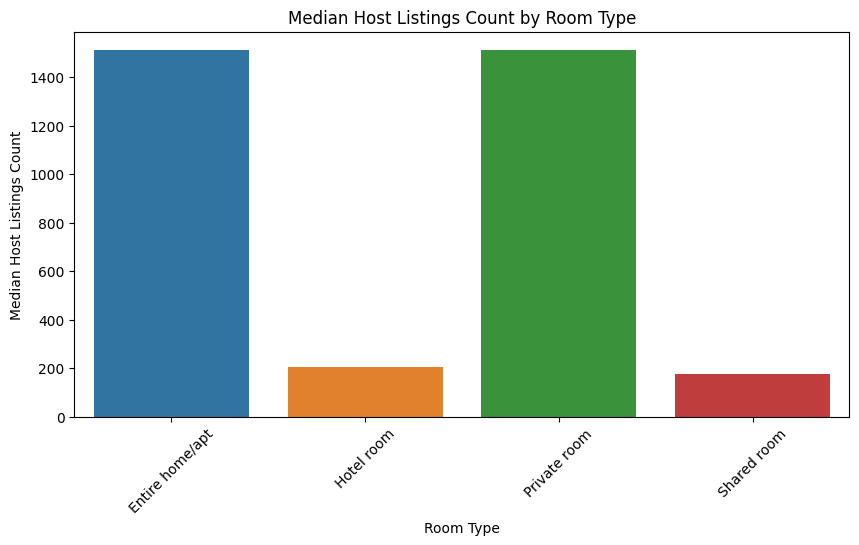

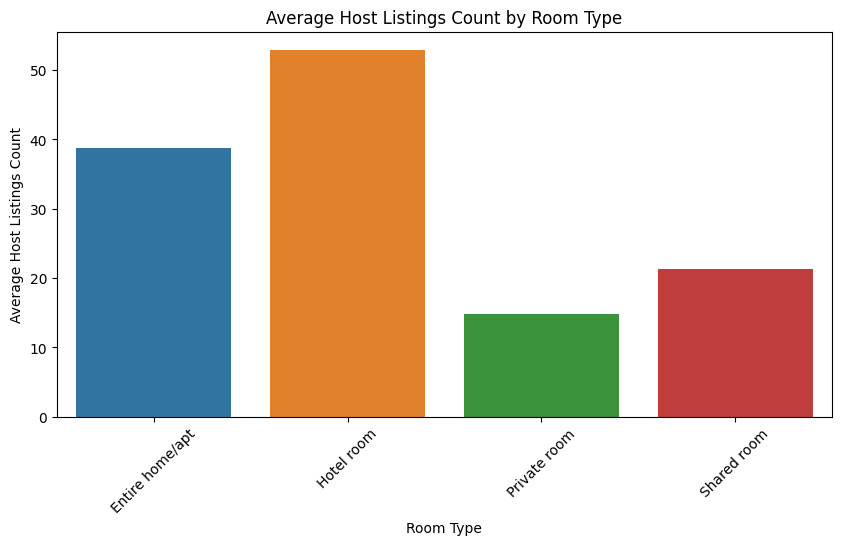

In [19]:
query = """
SELECT
    room_type,
    CASE
        WHEN COUNT(*) % 2 = 1 THEN
            CAST(MAX(host_listings_count) AS REAL)
        ELSE
            (CAST(MAX(host_listings_count) AS REAL) + CAST(MIN(host_listings_count) AS REAL)) / 2.0
    END AS median_host_listings_count,
    AVG(host_listings_count) AS average_host_listings_count
FROM ukairbnb_cleaned
GROUP BY room_type;
"""
result = pd.read_sql_query(query, conn)
print(result)

# Median Host Listings Count by Room Type
plt.figure(figsize=(10, 5))
sns.barplot(data=result, x='room_type', y='median_host_listings_count')
plt.title('Median Host Listings Count by Room Type')
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('Median Host Listings Count')
plt.show()

# Mean Host Listings Count by Room Type
plt.figure(figsize=(10, 5))
sns.barplot(data=result, x='room_type', y='average_host_listings_count')
plt.title('Average Host Listings Count by Room Type')
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('Average Host Listings Count')
plt.show()


**Key Findings:**
1. Across room types, host listing counts show significant variations.
2. Median figures, representing the middle point in the distribution, reveal that the majority of hosts have relatively few listings.
3. In contrast, mean values, indicative of the average, are much higher, suggesting that a smaller number of hosts manage a substantial portfolio.
4. These distinctions emphasize the diversity in hosting practices within each room type. For instance, in the "Entire home/apt" category, the median is 1,512, while the mean is 38.71, illustrating the presence of both small and large-scale hosts.
5. This pattern holds across room types, reflecting the multifaceted nature of Airbnb hosting.

#### How many hosts have different types of property?

In [20]:
query = """
WITH HostRoomTypeCounts AS (
    SELECT
        host_id,
        GROUP_CONCAT(DISTINCT room_type) AS room_types
    FROM ukairbnb_cleaned
    GROUP BY host_id
)

SELECT
    room_types,
    COUNT(*) AS host_count
FROM HostRoomTypeCounts
GROUP BY room_types
ORDER BY host_count DESC;

"""
result = pd.read_sql_query(query, conn)
print(result)


                                  room_types  host_count
0                            Entire home/apt       29916
1                               Private room       19146
2               Private room,Entire home/apt        1720
3               Entire home/apt,Private room        1360
4                                Shared room         219
5                   Private room,Shared room          38
6                                 Hotel room          28
7                Entire home/apt,Shared room          20
8                   Shared room,Private room          19
9                    Hotel room,Private room           9
10  Entire home/apt,Private room,Shared room           8
11                   Private room,Hotel room           5
12  Private room,Entire home/apt,Shared room           4
13   Hotel room,Entire home/apt,Private room           4
14                Hotel room,Entire home/apt           4
15  Entire home/apt,Shared room,Private room           4
16                Entire home/a

**Key Findings:**
1. A significant portion of hosts (around 59%) offer "Entire home/apt" as the primary room type.
2. Many hosts offer more than one room type. The combination of "Private room" and "Entire home/apt" is the most common, indicating hosts often provide options within their properties.
3. Only a small percentage of hosts list "Shared room" as their primary room type, suggesting it may be less popular among hosts.
4. Some hosts list "Hotel room" as a room type, and it's often combined with other types, such as "Private room" or "Entire home/apt." This could be due to hotels using Airbnb to list their rooms.
5. The combination of "Shared room" with other types is relatively rare, indicating that shared rooms may cater to a specific niche of travellers.
   
The dataset does contain some unusual combinations of room types that could be anomalies or inaccuracies in host listings. These combinations include both the presence of room types in atypical settings and the co-occurrence of *conflicting types, like "Private room, Entire home/apt" and "Private room, Hotel room, Shared room."* 

While these may represent exceptions, they also serve as a reminder to maintain data accuracy and consistency in Airbnb listings. Further examination of these listings may be needed to ensure data quality and the user experience for Airbnb guests.

#### Distinct property_type

In [21]:
# Distinct property_type:
query = "SELECT COUNT(DISTINCT property_type) AS Total_unique_property_type FROM ukairbnb_cleaned"
result = pd.read_sql_query(query, conn)
result

Total_unique_property_type
0                          99

#### What are the most popular property type?

                         property_type  number_of_listings
0                   Entire rental unit               32539
1          Private room in rental unit               13741
2                 Private room in home               10408
3                         Entire condo                8467
4                          Entire home                7455
5                Private room in condo                3259
6            Entire serviced apartment                1964
7            Private room in townhouse                1325
8                     Entire townhouse                1135
9                        Room in hotel                 553
10   Private room in bed and breakfast                 532
11                         Entire loft                 384
12          Private room in guesthouse                 319
13              Room in boutique hotel                 274
14                   Entire guesthouse                 198
15                Private room in loft                 1

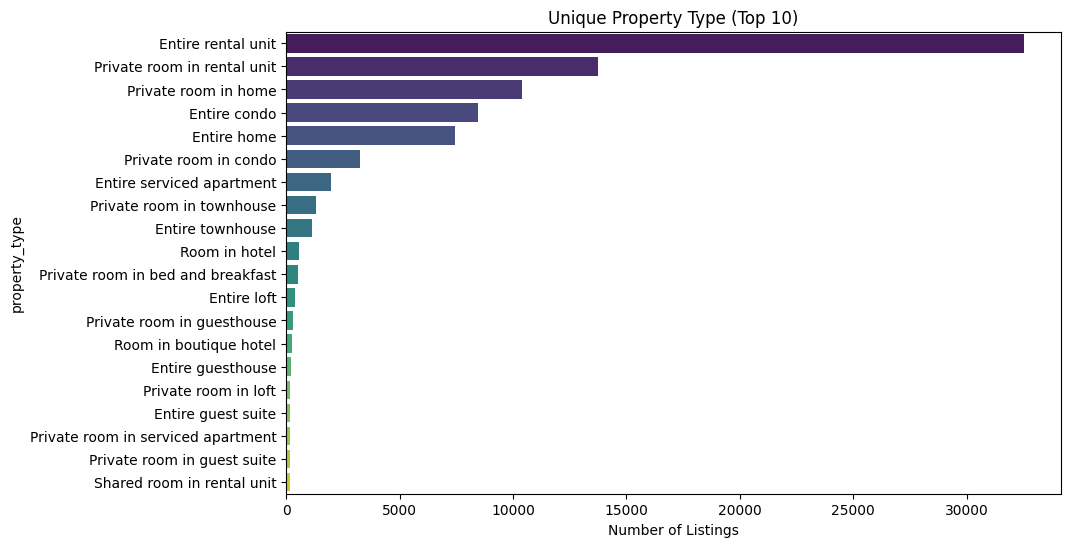

In [22]:
# Distribution of property type
query = """
SELECT property_type, COUNT(property_type) AS number_of_listings
FROM ukairbnb_cleaned
GROUP BY property_type
ORDER BY number_of_listings DESC
LIMIT 20
"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_listings', y='property_type', data=result, palette='viridis')
plt.title('Unique Property Type (Top 10)')
plt.xlabel('Number of Listings')
plt.ylabel('property_type')
plt.show()


**Key Findings:**
1. 32,953 of the hosts are listed under Entire rental unit followed by Private room in a rental unit with 1,4069 hosts registered.
2. However, only 558 hosts have listings under hotels.

#### What are the most popular room types?

         room_type  number_of_listings
0  Entire home/apt               52938
1     Private room               31406
2      Shared room                 412
3       Hotel room                 211


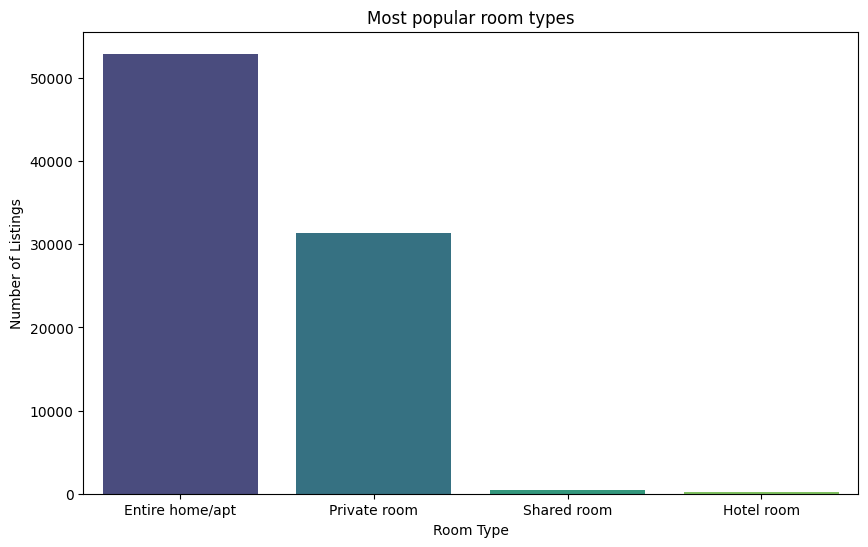

In [23]:
query = """
SELECT room_type, COUNT(room_type) AS number_of_listings
FROM ukairbnb_cleaned
GROUP BY room_type
ORDER BY number_of_listings DESC
"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='number_of_listings', data=result, palette='viridis')
plt.title('Most popular room types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

**Key Findings:**
1. Two categories - Entire home/apt (52,938 listings) and Private room (31,406 listings) - dominate the market, while Shared room (412 listings) and Hotel room (211 listings) aren't popular.

#### What is the average price for each Property Type?¶


               property_type    avg_price
0               Entire villa  1082.694444
1                       Dome   856.000000
2         Room in aparthotel   615.319672
3          Entire guesthouse   519.363636
4                     Castle   414.000000
5                       Riad   377.000000
6           Entire townhouse   369.909251
7     Private room in hostel   342.473684
8       Shared room in condo   334.375000
9  Entire serviced apartment   319.384420


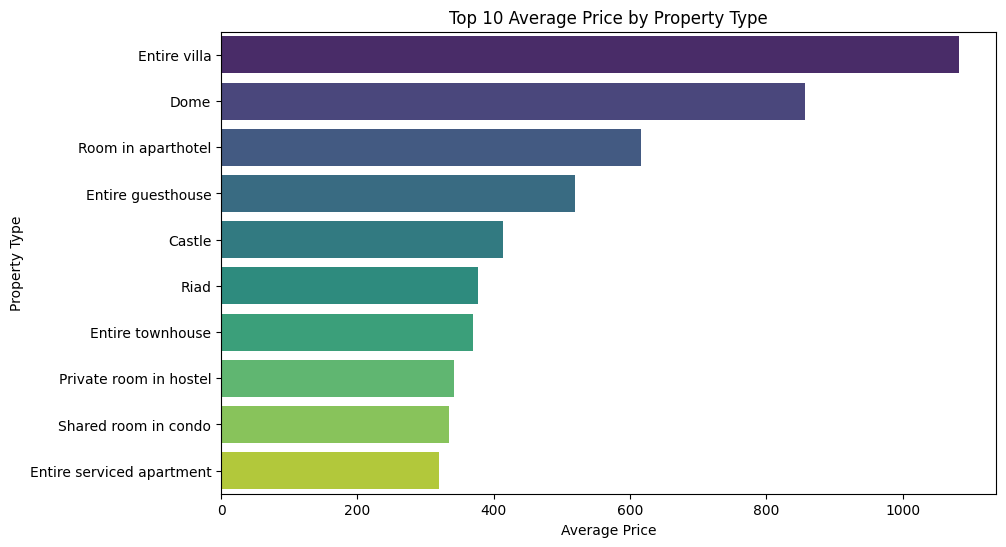

In [24]:
query = """
SELECT property_type, AVG(price) AS avg_price
FROM ukairbnb_cleaned
GROUP BY property_type
ORDER BY avg_price DESC
LIMIT 10
"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_price', y='property_type', data=result, palette='viridis')
plt.title('Top 10 Average Price by Property Type')
plt.xlabel('Average Price')
plt.ylabel('Property Type')
plt.show()


**Key Findings:**
1. Entire villa" has the highest average price at 1082.69, making it the most expensive property type on average.
2. There is a significant price variation among different property types. For example, "Dome" and "Room in aparthotel" also have relatively high average prices, indicating that they are relatively expensive accommodation options.
3. On the other hand, "Shared room in condo" and "Entire serviced apartment" are among the more affordable options, with average prices below 350.
4. Hosts and travelers can use this information to understand the average price range for different property types. It can help hosts in pricing their listings competitively, and travelers can choose accommodations that fit their budget.
5. The price differences may also reflect the demand for certain types of accommodations. For example, villas may be in higher demand for luxury travelers, while shared rooms and serviced apartments may cater to budget-conscious travelers.

#### How does the price change depending on room type?

         room_type  median_price
0       Hotel room         200.0
1  Entire home/apt         153.0
2     Private room          55.0
3      Shared room          47.5


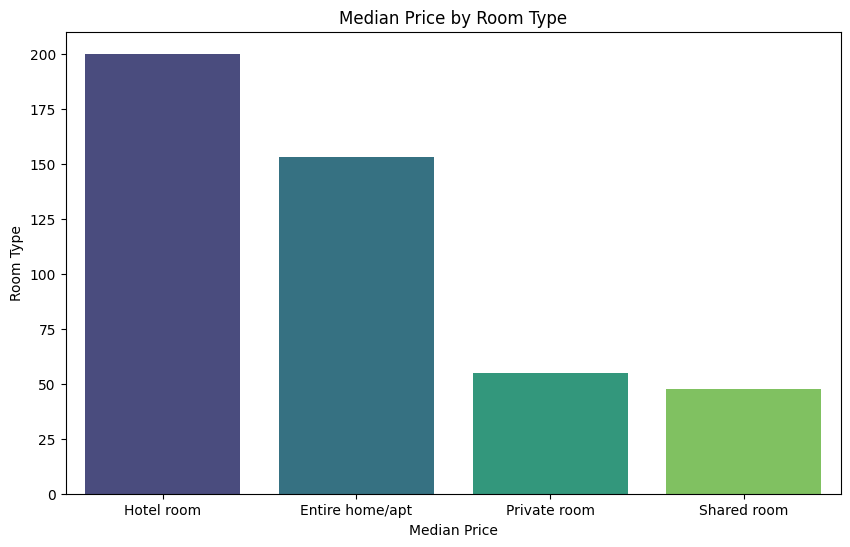

In [25]:
query = """
SELECT
    room_type,
    AVG(price) AS median_price
FROM (
    SELECT
        room_type,
        price,
        ROW_NUMBER() OVER (PARTITION BY room_type ORDER BY price) AS row_num,
        COUNT(*) OVER (PARTITION BY room_type) AS total_rows
    FROM ukairbnb_cleaned
) AS ranked
WHERE row_num IN (CEIL(total_rows / 2.0), FLOOR(total_rows / 2.0) + 1)
GROUP BY room_type
ORDER BY median_price DESC;
"""

result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='median_price', data=result, palette='viridis')
plt.title('Median Price by Room Type')
plt.xlabel('Median Price')
plt.ylabel('Room Type')
plt.show()

**Key Findings:**
1. "Hotel room" has the highest median price at 200. It's relatively more expensive, and its popularity count is 211. This indicates that while it's a pricier option, there's still demand for hotel rooms, likely from travelers looking for a higher-end experience.
2.  "Entire home/apt" has a median price of 154, making it moderately priced. However, it's the most popular room type with a popularity count of 52,938. This suggests that travelers are often willing to pay a bit more for the privacy and comfort of having an entire home or apartment to themselves.
3.  "Private room" is more affordable, with a median price of 55. It's the second most popular room type, with a popularity count of 31,406. Travelers looking for privacy but with a tighter budget may find private rooms appealing.
4.  "Shared room" is the most budget-friendly option, with a median price of 47.50. While it's the least popular with a popularity count of 412, it still caters to travelers who are primarily concerned with cost savings.
5.  The data highlights the trade-off between price and comfort. Travelers looking for affordability may opt for shared rooms, while those willing to pay more prefer entire home/apartment or private rooms. The popularity of each room type aligns with its price point.
6.  The market appears to cater to travelers with a range of budgets, from luxury hotel rooms to budget-friendly shared accommodations. This diversity reflects the varied preferences and financial considerations of travelers.

#### How does the number of reviews change depending on room type?

         room_type  median_review
0       Hotel room            6.0
1     Private room            4.0
2  Entire home/apt            4.0
3      Shared room            1.0


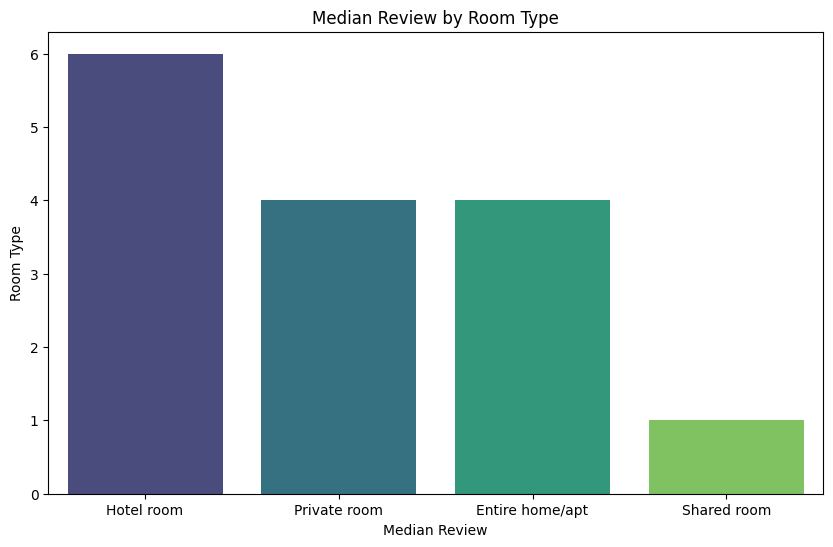

In [26]:
query = """
SELECT
    room_type,
    AVG(number_of_reviews) AS median_review
FROM (
    SELECT
        room_type,
        number_of_reviews,
        ROW_NUMBER() OVER (PARTITION BY room_type ORDER BY number_of_reviews) AS row_num,
        COUNT(*) OVER (PARTITION BY room_type) AS total_rows
    FROM ukairbnb_cleaned
) AS ranked
WHERE row_num IN (CEIL(total_rows / 2.0), FLOOR(total_rows / 2.0) + 1)
GROUP BY room_type
ORDER BY median_review DESC;
"""

result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='median_review', data=result, palette='viridis')
plt.title('Median Review by Room Type')
plt.xlabel('Median Review')
plt.ylabel('Room Type')
plt.show()

**Key Findings**
1. Private rooms and entire homes/apartments have the same median number of reviews, which is 4. This suggests that both room types are equally popular in terms of guest reviews. Guests who stay in private rooms and entire homes/apartments are equally likely to leave reviews, indicating that these room types are comfortable and appealing to guest
2. Hotel rooms have a median of 9 reviews. This means that, on average, hotel rooms in the dataset receive the most reviews. This could be due to various factors, such as hotels encouraging guest reviews on the platform used in the dataset or unlimited bookings for hotel rooms compared to other room types.room

#### What is the average star rating and how does it affect room type/ property type popularity?

          room_type                      property_type  average_rating  \
0       Shared room  Shared room in religious building        5.000000   
1      Private room          Private room in treehouse        5.000000   
2      Private room             Private room in island        5.000000   
3        Hotel room                Room in rental unit        5.000000   
4   Entire home/apt                               Yurt        5.000000   
5   Entire home/apt                          Treehouse        5.000000   
6   Entire home/apt                 Shipping container        5.000000   
7   Entire home/apt                             Island        4.960000   
8      Private room                Private room in hut        4.892500   
9      Private room              Private room in floor        4.870000   
10     Private room     Private room in shepherd's hut        4.840000   
11     Private room          Private room in farm stay        4.840000   
12  Entire home/apt                   

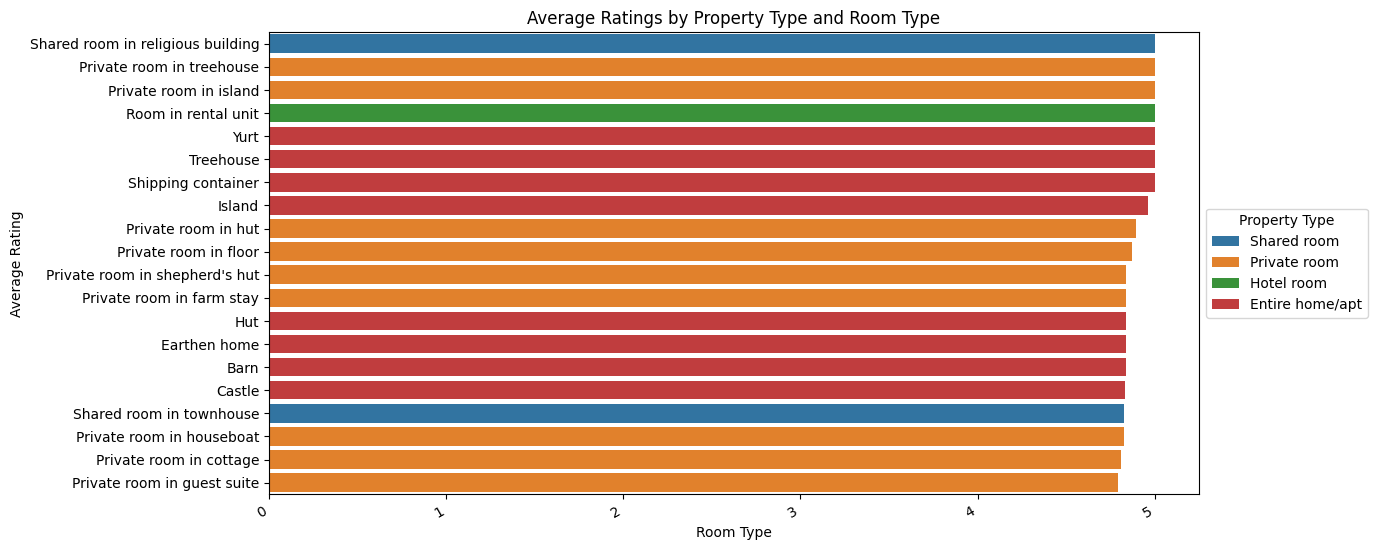

In [27]:
query = """
WITH AvgRating AS (
    SELECT
        room_type,
        property_type,
        AVG(review_scores_value) AS average_rating
    FROM ukairbnb_cleaned
    GROUP BY room_type, property_type
)

SELECT
    room_type,
    property_type,
    average_rating,
    SUM(CASE
        WHEN average_rating >= 4.5 THEN 1
        ELSE 0
    END) AS high_rating_count
FROM AvgRating
GROUP BY room_type, property_type
ORDER BY high_rating_count DESC, average_rating DESC
limit 20
"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='average_rating', y='property_type', hue='room_type', dodge = False)
plt.title('Average Ratings by Property Type and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Property Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

**Key Findings**
1. property types with the highest average ratings often have a limited number of listings. This suggests that they provide unique and exceptional experiences, which are valued by guests who seek a specific type of stay
2.  However, the most popular room type, "Entire home/apartment," offers a range of property types, each with high ratings, catering to a wider audience.
3.  Shared room in religious building" boasts the highest average rating at 5.0, despite having just 412 listings, making it a unique and highly-rated option for select travelers.
4.  Property types like "Private room in treehouse" and "Private room in island" offer the highest average ratings of 5.0, catering to guests seeking unique experiences. *
The "Private room" category, with 31,406 listings, reflects the popularity of unconventional accommodations*
5.  Hotel rooms consistently receive an average rating of 5.0, with 211 listings, suggesting a niche market with consistently high ratings.
6.  The "Entire home/apt" room type, with 52,938 listings, is the most popular, providing diverse property types with high average ratings to suit a broad range of travellers..

#### How does the availability change depending on room type?

         room_type  median_availability
0       Hotel room                168.0
1      Shared room                 87.5
2  Entire home/apt                 69.0
3     Private room                 51.0


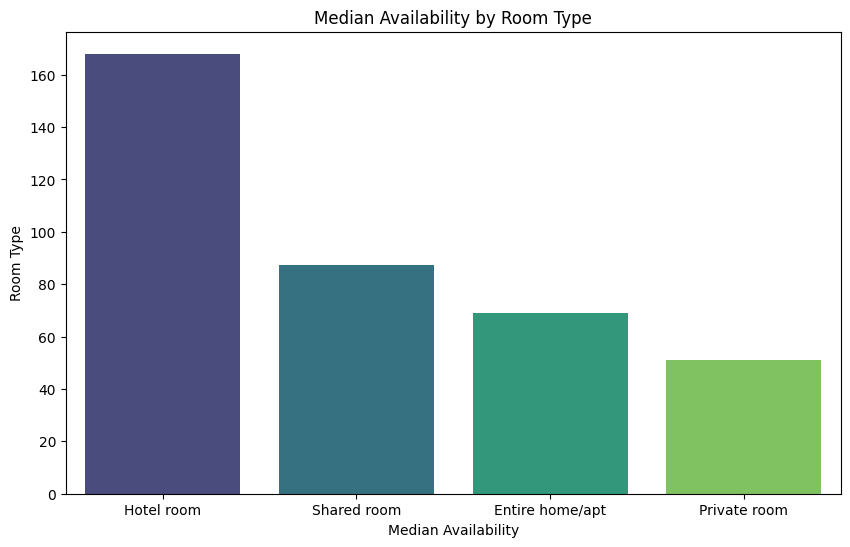

In [28]:
query = """
SELECT
    room_type,
    AVG(availability_365) AS median_availability
FROM (
    SELECT
        room_type,
        availability_365,
        ROW_NUMBER() OVER (PARTITION BY room_type ORDER BY availability_365) AS row_num,
        COUNT(*) OVER (PARTITION BY room_type) AS total_rows
    FROM ukairbnb_cleaned
) AS ranked
WHERE row_num IN (CEIL(total_rows / 2.0), FLOOR(total_rows / 2.0) + 1)
GROUP BY room_type
ORDER BY median_availability DESC;

"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='median_availability', data=result, palette='viridis')
plt.title('Median Availability by Room Type')
plt.xlabel('Median Availability')
plt.ylabel('Room Type')
plt.show()

**Key Findings**
1. In my opinion, these results are reasonable.
2. Hotel rooms have the highest median availability at 168 days with an average rating of 5.0, offering guests a consistent and extended booking window, representing approximately 46.03% of the year.
3. Shared rooms provide a moderate availability of 87.5 days, allowing guests to book for about 23.97% of the year. *While not as high as hotel rooms, they offer a good balance of availability.*
4. Entire homes/apartments and private rooms have lower availability, with medians of 69 and 51 days, respectively, representing approximately 18.90% and 13.51% of the year. *Guests considering these options could plan their bookings in advance due to the limited availability compared to hotel and shared rooms.*

#### Which hosts are the busiest and why?

In [71]:
# how many unique hosts in each borough
query = """
SELECT neighbourhood, count(DISTINCT host_id) AS total_hosts
FROM ukairbnb_cleaned
GROUP BY neighbourhood
ORDER BY total_hosts DESC
"""
result = pd.read_sql_query(query, conn)
print(result)

             neighbourhood  total_hosts
0                  Hackney         4816
1            Tower Hamlets         4525
2              Westminster         4248
3                  Lambeth         3589
4                Southwark         3575
5                Islington         3356
6               Wandsworth         3314
7                   Camden         3262
8   Kensington and Chelsea         2943
9   Hammersmith and Fulham         2560
10                Lewisham         1985
11                Haringey         1783
12                   Brent         1694
13                  Newham         1544
14                  Ealing         1430
15               Greenwich         1375
16                  Barnet         1361
17          Waltham Forest         1304
18                  Merton         1090
19    Richmond upon Thames          991
20                 Croydon          980
21                Hounslow          823
22                 Bromley          604
23                 Enfield          587


     host_id  neighbourhood  average_reviews
0   10398979      Islington       934.000000
1    7716401         Camden       834.000000
2     923042  Tower Hamlets       800.000000
3   10407628         Camden       724.000000
4   47205373     Hillingdon       711.000000
5  143344822     Hillingdon       704.000000
6   87449409        Hackney       664.500000
7   14148041         Newham       661.666667
8     554519    Westminster       655.000000
9    2990888      Islington       648.000000


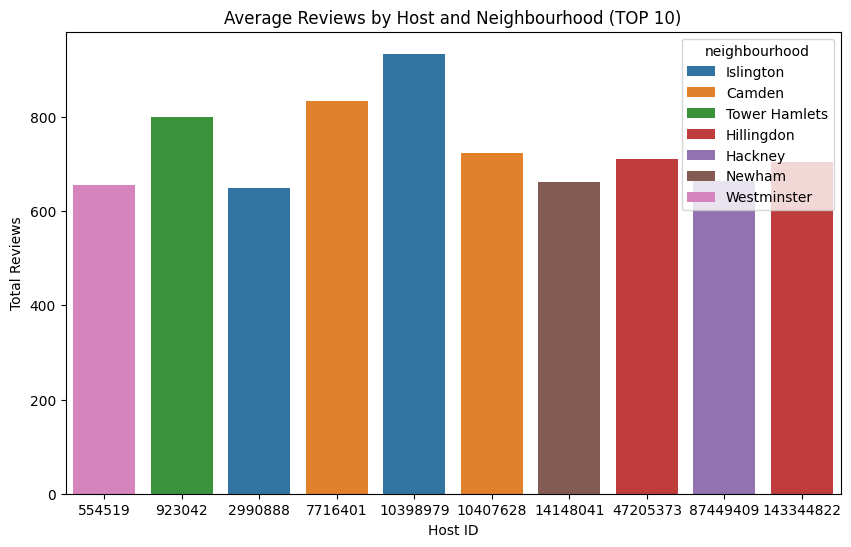

In [29]:
query = """
SELECT host_id,neighbourhood, avg(number_of_reviews) AS average_reviews
FROM ukairbnb_cleaned
GROUP BY host_id,neighbourhood
ORDER BY average_reviews DESC
LIMIT 10
"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot to show the busiest hosts by the total number of reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='host_id', y='average_reviews', data=result, hue='neighbourhood', dodge=False)
plt.title('Average Reviews by Host and Neighbourhood (TOP 10)')
plt.xlabel('Host ID')
plt.ylabel('Total Reviews')
plt.show()

**Key Findings:**
1. **Islington, 10398979 Host:** This host in Islington has an impressive average of 934 reviews. *Islington is a popular neighbourhood, which likely contributes to high guest traffic. Factors such as attractive attractions, convenient transportation, and positive guest experiences might explain the host's busyness.*
2. **Camden, 7716401 Host:** Host also receives a significant number of reviews on average (834). *Camden is known for its vibrant culture and tourist spots, making it an attractive destination. High demand from tourists and positive feedback may contribute to this host's busy schedule.*
3. **Tower Hamlets, 923042 Host:** This host in Tower Hamlets receives around 800 reviews on average. *Tower Hamlets encompasses areas like Canary Wharf, which is popular for business travellers, and attractions like Brick Lane.* The diversity of visitors, including both business and leisure travellers, could explain the host's high review count.
4. The neighbourhood popularity statistics show the number of listings in different neighbourhoods, helping us understand host busyness based on location demand.
5. Popular neighbourhoods like Westminster, Tower Hamlets, and Hackney are likely to have a higher concentration of Airbnb listings. Hosts in these areas tend to be busier due to the higher demand from travellers and tourists seeking accommodations in these sought-after locations.

In summary, host busyness is typically influenced by the location's popularity, the number of attractions, and the overall demand for accommodations in a particular neighbourhood. Busy hosts often provide excellent guest experiences, which lead to more reviews and, in turn, attract even more guests.

### Further Analysis 2: Location and Pricing Analysis

#### What are the most popular neighbourhoods

             neighbourhood  number_of_listings
0              Westminster                9332
1            Tower Hamlets                6900
2                  Hackney                6052
3   Kensington and Chelsea                5582
4                   Camden                5556
5                Southwark                4833
6                  Lambeth                4670
7                Islington                4568
8               Wandsworth                4293
9   Hammersmith and Fulham                3722
10                   Brent                2603
11                Lewisham                2525
12                Haringey                2307
13                  Newham                2235
14                  Ealing                2121
15                  Barnet                2085
16               Greenwich                1886
17          Waltham Forest                1685
18                 Croydon                1456
19                  Merton                1428
20    Richmon

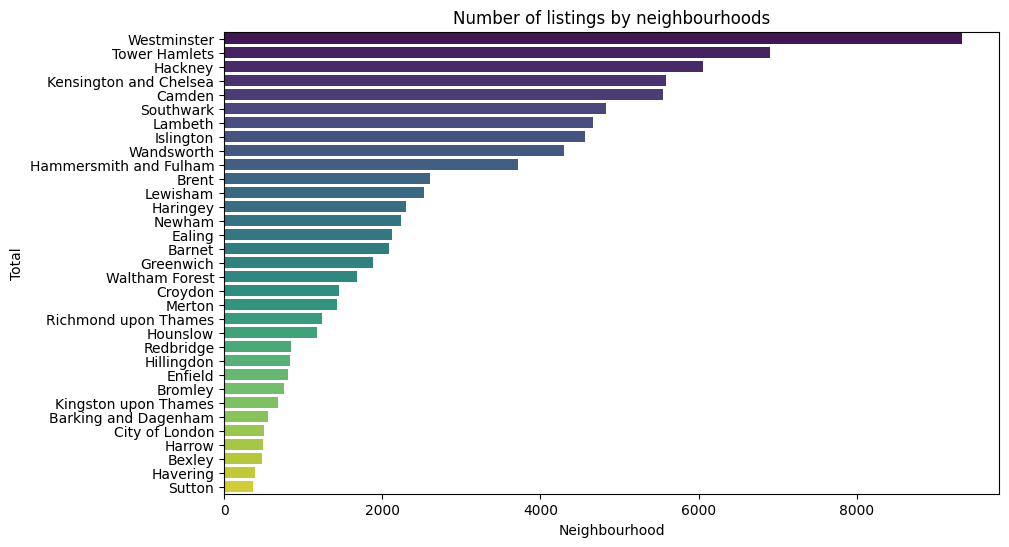

In [30]:

query = """
SELECT neighbourhood, COUNT(neighbourhood) AS number_of_listings
FROM ukairbnb_cleaned
GROUP BY neighbourhood
ORDER BY number_of_listings DESC
"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_listings', y='neighbourhood', data=result, palette='viridis')
plt.title('Number of listings by neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Total')
plt.show()

**Key Findings:**
1. No surprise that the most popular neighbourhoods are located in the centre of London.
2. The confident leader is Westminster (9666 listings).
3. The only exception is the City of London (515 listings) because it is the smallest neighbourhood and there you can't find many residential properties.
4. The least popular is Sutton (372 listings).

#### How does the price change depending on neighbourhood?¶

In [31]:
query = """
SELECT
    neighbourhood,
    AVG(price) AS median_price
FROM (
    SELECT
        neighbourhood,
        price,
        ROW_NUMBER() OVER (PARTITION BY neighbourhood ORDER BY price) AS row_num,
        COUNT(*) OVER (PARTITION BY neighbourhood) AS total_rows
    FROM ukairbnb_cleaned
) AS ranked
WHERE row_num IN (CEIL(total_rows / 2.0), FLOOR(total_rows / 2.0) + 1)
GROUP BY neighbourhood
ORDER BY median_price DESC;

"""
result = pd.read_sql_query(query, conn)
print(result)

             neighbourhood  median_price
0   Kensington and Chelsea         197.0
1              Westminster         195.0
2           City of London         170.0
3                   Camden         135.0
4   Hammersmith and Fulham         126.0
5     Richmond upon Thames         116.0
6               Wandsworth         110.0
7                Islington         107.5
8                Southwark         100.0
9                   Merton         100.0
10                 Hackney          98.0
11                 Lambeth          96.0
12           Tower Hamlets          95.0
13                Hounslow          95.0
14                  Barnet          95.0
15               Greenwich          90.0
16                   Brent          89.0
17                  Newham          85.0
18    Kingston upon Thames          85.0
19                  Ealing          85.0
20                Lewisham          80.0
21                Havering          80.0
22                Haringey          80.0
23          Walt

**Key Findings**
1. The highest-priced neighbourhoods in London, such as Kensington and Chelsea, Westminster, and the City of London, continue to command premium nightly rates (197, 195, and 170 pounds, respectively).
2. 
Beyond the top three, the pricing variation amongneighbourhoodss is more gradual
3. 
In total, only fivneighbourhoodsds have median prices exceeding the overall median for London, which is 100 pounds per nigh
4. .
Travelers have the option to explore more affordable accommodations in the majority of Londonneighbourhoodsods, making it feasible to find budget-friendly options.

#### What type of property dominates in each neighbourhood?

In [32]:
query = """
SELECT
    room_type,    
    count((neighbourhood)) AS property_count
FROM ukairbnb_cleaned
GROUP BY room_type
ORDER BY property_count
"""
result = pd.read_sql_query(query, conn)
result

room_type  property_count
0       Hotel room             211
1      Shared room             412
2     Private room           31406
3  Entire home/apt           52938

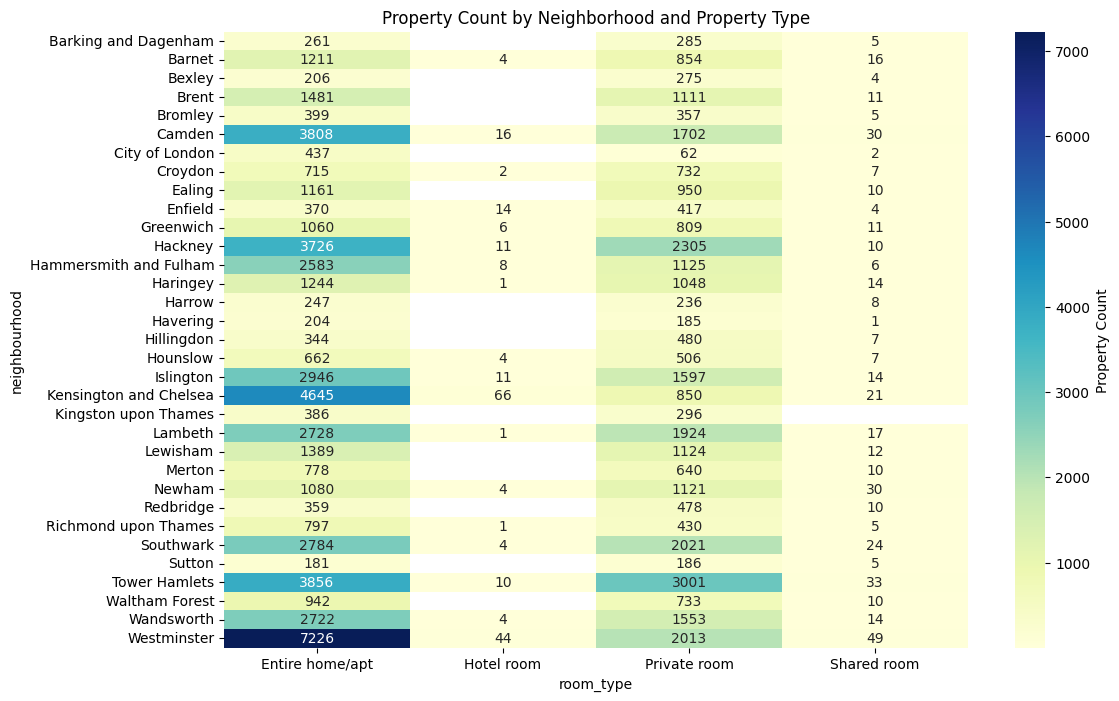

In [33]:
query = """
SELECT
    neighbourhood,
    room_type,    
    count((neighbourhood)) AS property_count
FROM ukairbnb_cleaned
GROUP BY neighbourhood, room_type
ORDER BY neighbourhood, room_type;
"""
result = pd.read_sql_query(query, conn)

# Pivot the DataFrame to create a heatmap
heatmap_data = result.pivot(index='neighbourhood', columns='room_type', values='property_count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Property Count'})
plt.title('Property Count by Neighborhood and Property Type')
plt.show()

**Key Insights**
1. The Entire home/apt (52,938 listings) and Private room (31,406 listings) dominate the market.
2. In many neighbourhoods, such as Tower Hamlets and Westminster, Private rooms dominate the listings, with Tower Hamlets having the highest count of 3001 Private room listings.
3. Entire home/apartment listings lead in several areas, with Westminster having the most with 7226 listings, while surprisingly, it lacks a significant number of hotel room listings, having only 44 hotel room listings.
4. Some neighbourhoods have an almost equal distribution of Entire home/apartment and Private room listings, like Barking and Dagenham and Brent.
5. Hotel rooms are more prevalent in Kensington and Chelsea (66 listings), while other neighbourhoods feature a mix of room types.
6. There are 15 neighbourhoods that do not have any hotel room listings. *The absence of hotels in these neighbourhoods might reflect a more localized and community-driven approach to short-term rentals, with hosts focusing on offering a variety of non-hotel accommodations.*

Sutton's low popularity may be affected by the diversity of available room types. If a neighbourhood has a limited variety of room types, it might not appeal to a wide range of travellers. *Sutton's room type distribution shows a lack of hotel rooms and a low number of shared rooms, which could limit the choices for potential guests.*

#### How does the number of reviews change depending on neighbourhood?

In [76]:
# total reviews
query = """
SELECT
    neighbourhood,
    sum(number_of_reviews) AS total_review
    FROM ukairbnb_cleaned
GROUP BY neighbourhood
ORDER BY total_review DESC;
"""

result = pd.read_sql_query(query, conn)
print(result)

             neighbourhood  total_review
0              Westminster        191850
1                   Camden        137325
2            Tower Hamlets        119081
3   Kensington and Chelsea        104479
4                Southwark        101966
5                  Lambeth         98948
6                  Hackney         95842
7                Islington         92029
8               Wandsworth         71085
9   Hammersmith and Fulham         70215
10                   Brent         44063
11                Haringey         39544
12                  Ealing         35976
13                Lewisham         35022
14                  Newham         33819
15               Greenwich         31273
16    Richmond upon Thames         29747
17                  Barnet         24166
18                Hounslow         22288
19          Waltham Forest         20954
20                 Croydon         20022
21              Hillingdon         18630
22                  Merton         17694
23          City

             neighbourhood  median_review
0                   Camden            6.0
1              Westminster            5.0
2                Southwark            5.0
3     Richmond upon Thames            5.0
4                  Lambeth            5.0
5           City of London            5.0
6            Tower Hamlets            4.0
7                   Sutton            4.0
8                   Newham            4.0
9                 Lewisham            4.0
10    Kingston upon Thames            4.0
11  Kensington and Chelsea            4.0
12               Islington            4.0
13                Hounslow            4.0
14                Havering            4.0
15                  Harrow            4.0
16                Haringey            4.0
17  Hammersmith and Fulham            4.0
18                 Hackney            4.0
19               Greenwich            4.0
20                 Bromley            4.0
21                   Brent            4.0
22              Wandsworth        

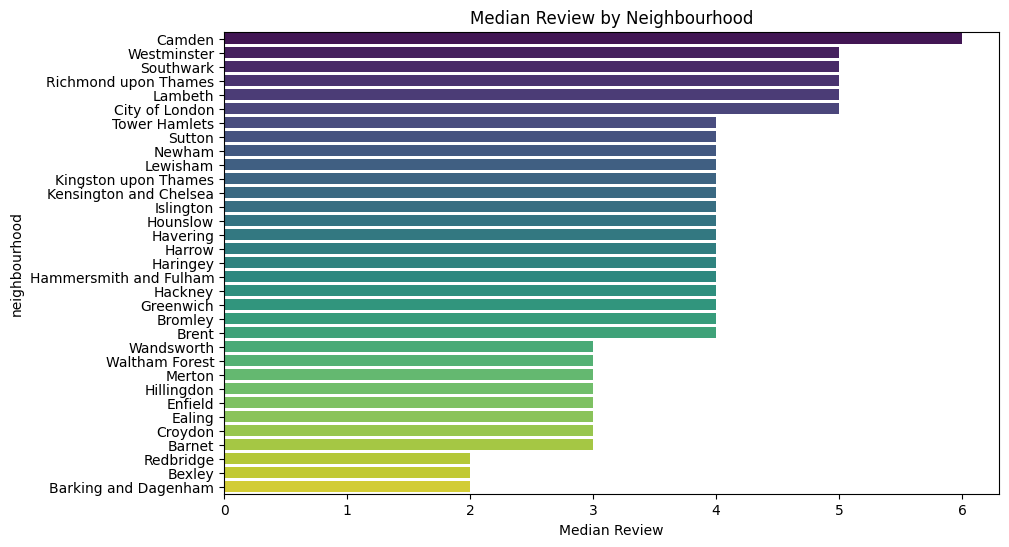

In [80]:
query = """
SELECT
    neighbourhood,
    AVG(number_of_reviews) AS median_review
FROM (
    SELECT
        neighbourhood,
        number_of_reviews,
        ROW_NUMBER() OVER (PARTITION BY neighbourhood ORDER BY number_of_reviews) AS row_num,
        COUNT(*) OVER (PARTITION BY neighbourhood) AS total_rows
    FROM ukairbnb_cleaned
) AS ranked
WHERE row_num IN (CEIL(total_rows / 2.0), FLOOR(total_rows / 2.0) + 1)
GROUP BY neighbourhood
ORDER BY median_review DESC;
"""

result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='median_review', y='neighbourhood', data=result, palette='viridis')
plt.title('Median Review by Neighbourhood')
plt.xlabel('Median Review')
plt.ylabel('neighbourhood')
plt.show()

**Key Insights**
1. The neighbourhoods of Camden and Westminster have the highest median number of reviews, with a median of 6 reviews. These areas are not only popular but also receive a significant amount of feedback from guests.
2. There is a positive correlation between neighbourhood popularity and the number of reviews. Neighbourhoods like Camden, Westminster, and Southwark, which are popular among travellers, tend to receive more reviews. Travellers are more likely to leave reviews for neighbourhoods they visit frequently.
3. The median review count in some neighbourhoods, like Kensington and Chelsea and Hammersmith and Fulham, is relatively lower at 4.0. This suggests that the high cost of accommodations in these areas might be discouraging some guests from leaving reviews.
4. Some neighbourhoods, such as Sutton and Newham, have a median review count of 4.0, indicating that they receive a moderate number of reviews despite not being among the most popular or expensive neighbourhoods. This could be due to other factors, such as unique attractions or excellent hospitality.
5. While many neighbourhoods have a median of 4-5 reviews, others, such as Redbridge and Bexley, have a median of only 2 reviews. This suggests that these neighbourhoods may not attract as many visitors or may not have a significant presence in the short-term rental market.
6. Residential Areas Suburban neighbourhoods like Bromley, Hillingdon, and Enfield have a median review count of 3, indicating that while they may be less popular than city-centre neighbourhoods, they still receive moderate guest feedback.

#### How does the availability change depending on the neighbourhood?

             neighbourhood  median_availability
0                   Bexley                248.0
1                 Havering                240.0
2               Hillingdon                186.0
3                  Enfield                179.0
4     Barking and Dagenham                169.0
5                Redbridge                162.0
6                   Harrow                159.0
7                  Croydon                158.0
8                  Bromley                128.0
9                 Hounslow                111.0
10                  Barnet                110.0
11               Greenwich                101.5
12  Kensington and Chelsea                 90.0
13                  Sutton                 89.0
14                  Newham                 87.0
15                  Ealing                 87.0
16             Westminster                 85.0
17                   Brent                 84.0
18    Kingston upon Thames                 74.5
19          City of London              

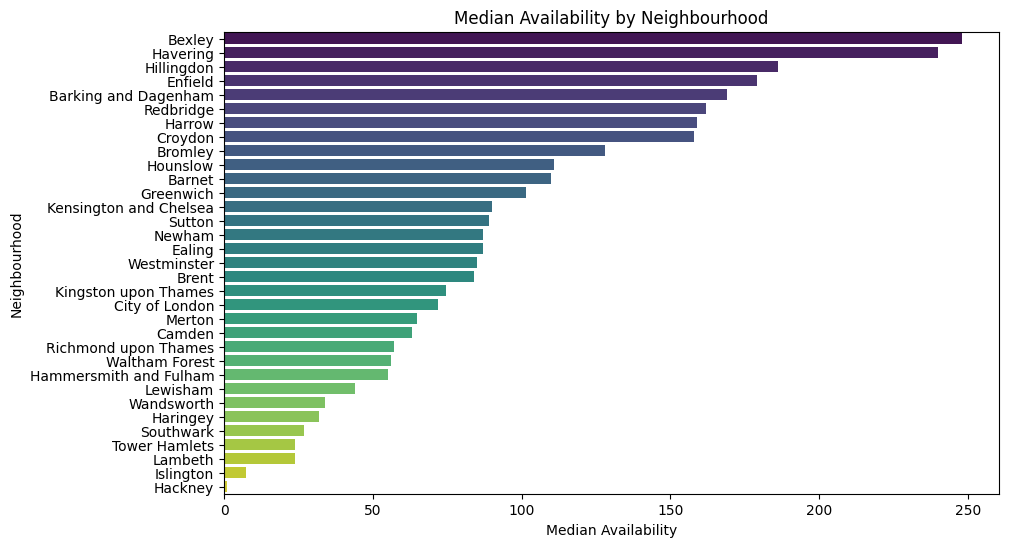

In [35]:
query = """
SELECT
    neighbourhood,
    AVG(availability_365) AS median_availability
FROM (
    SELECT
        neighbourhood,
        availability_365,
        ROW_NUMBER() OVER (PARTITION BY neighbourhood ORDER BY availability_365) AS row_num,
        COUNT(*) OVER (PARTITION BY neighbourhood) AS total_rows
    FROM ukairbnb_cleaned
) AS ranked
WHERE row_num IN (CEIL(total_rows / 2.0), FLOOR(total_rows / 2.0) + 1)
GROUP BY neighbourhood
ORDER BY median_availability DESC;

"""
result = pd.read_sql_query(query, conn)
print(result)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='median_availability', y='neighbourhood', data=result, palette='viridis')
plt.title('Median Availability by Neighbourhood')
plt.xlabel('Median Availability')
plt.ylabel('Neighbourhood')
plt.show()

**Key Insights**
1. Neighborhoods like Bexley and Havering have the highest median availability, with 248 and 240 days available, respectively. This indicates a relatively low demand for accommodations in these areas, which could be influenced by factors like popularity and room type diversity.
2. The neighbourhoods with lower median availability tend to align with areas that are more popular, as seen in previous results. Westminster, a highly popular neighbourhood, has a median availability of only 85 days. This suggests that popular areas may have high demand and lower availability due to a competitive market.
3. The diversity of room types available in a neighbourhood can influence availability. For example, areas like Kensington and Chelsea, which offer a mix of room types, have a median availability of 90 days. This diversity likely accommodates various traveller preferences and contributes to balanced availability.
4. There are ten neighbourhoods where 50% of listings aren't available at all. That's rather strange. For example, in Tower Hamlets there are more than 2000 entire homes/apartments and more than 2000 private rooms. Maybe many of these listings aren't active anymore or there's some mistake in data.
5. Affordability plays a role in availability. Neighbourhoods with lower median prices, like Barking and Dagenham and Newham, tend to have higher availability. Travelers may be more inclined to book listings in areas with lower prices.
6. Surprisingly, two leaders are Havering and Hillingdon. There aren't hotel rooms which typically are the most available. But 50% of entire homes/apartments (median more than 228 days per year) and private rooms (median more than 172 days per year) in these areas are very available (look at the plot below). So we can suppose that their hosts actively use this property as a source of passive income while they live somewhere else.

#### Ranking of which neighborhoods and unit type is listed the most

In [36]:
query = """
SELECT
    neighbourhood,
    room_type,
    COUNT(*) AS listing_count
FROM ukairbnb_cleaned
GROUP BY neighbourhood, room_type
ORDER BY listing_count DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

              neighbourhood        room_type  listing_count
0               Westminster  Entire home/apt           7226
1    Kensington and Chelsea  Entire home/apt           4645
2             Tower Hamlets  Entire home/apt           3856
3                    Camden  Entire home/apt           3808
4                   Hackney  Entire home/apt           3726
..                      ...              ...            ...
111                 Croydon       Hotel room              2
112                Haringey       Hotel room              1
113                Havering      Shared room              1
114                 Lambeth       Hotel room              1
115    Richmond upon Thames       Hotel room              1

[116 rows x 3 columns]


**Key Insight** 
1. The top neighbourhoods with the highest number of entire home/apartment listings are Westminster, Kensington and Chelsea, Tower Hamlets, Camden, and Hackney. This suggests that entire home/apartment rentals are prevalent in these central London neighbourhoods, catering to travellers looking for more privacy and space.
2. There is a significant difference in listing counts between entire home/apartment listings and other room types. The dominance of entire home/apartment listings in these neighbourhoods indicates a strong demand for this type of accommodation, *while room types like hotel rooms and shared rooms have a much lower presence in these central areas. This reflects the diverse preferences of travellers and the competitive nature of the London Airbnb market.*

#### How does reviews affect star ratings

In [37]:

query = """
SELECT neighbourhood, avg(number_of_reviews) AS average_reviews, avg(review_scores_value) AS average_star_rating
FROM ukairbnb_cleaned
GROUP BY neighbourhood
ORDER BY average_reviews DESC, average_star_rating DESC
"""
result = pd.read_sql_query(query, conn)
print(result)

             neighbourhood  average_reviews  average_star_rating
0           City of London        27.594810             4.529641
1                   Camden        24.716523             4.556481
2     Richmond upon Thames        24.125710             4.743455
3               Hillingdon        22.418773             4.596270
4                  Lambeth        21.188009             4.681495
5                Southwark        21.097869             4.649642
6              Westminster        20.558294             4.553638
7                Islington        20.146454             4.651454
8                 Hounslow        18.904156             4.606853
9   Hammersmith and Fulham        18.864858             4.637555
10  Kensington and Chelsea        18.717126             4.575520
11           Tower Hamlets        17.258116             4.598409
12                Haringey        17.140876             4.673919
13                  Ealing        16.961810             4.629613
14                   Bren

**Key Findings**.
1. The number of reviews in a neighbourhood doesn't necessarily correlate with higher star ratings. For example, Tower Hamlets and the City of London have the highest review volumes but lower star ratings (4.53 and 4.56, respectively). This suggests that while these neighbourhoods are popular, some guests might have varying experiences, impacting their star ratings.
2. The diversity of property types, as discussed in previous results, can influence star ratings. For neighborhoods with a variety of room types, such as Richmond upon Thames and Wandsworth, guests may have more options to choose from, contributing to their higher average star ratings.
3. Neighborhoods with higher average star ratings tend to be more popular among guests. For instance, Richmond upon Thames and Kingston upon Thames, with average star ratings of 4.74 and 4.58, respectively, enjoy high popularity. This indicates that positive guest experiences often lead to increased neighbourhood popularity.

#### How does reviews affect price or availability

In [82]:
query = """
SELECT 
    COUNT(number_of_reviews) Number_of_reviews,
    CASE
        WHEN number_of_reviews < 5 THEN '<5 reviews'
        WHEN number_of_reviews BETWEEN 5 AND 10 THEN '5-10 reviews'
        WHEN number_of_reviews BETWEEN 10 AND 15 THEN '<10-15 reviews'
        WHEN number_of_reviews BETWEEN 15 AND 20 THEN '<15-20 reviews'
        WHEN number_of_reviews > 20 THEN '>20 reviews' END as Reviews, 
    AVG(number_of_reviews) Average_rating,  
    AVG(availability_365) Average_availability,
    AVG(minimum_nights) Avg_min_nights,
    AVG(price) Average_price
FROM
    ukairbnb_cleaned
GROUP BY
    Reviews
ORDER BY 
    Number_of_reviews DESC
    """
result = pd.read_sql_query(query, conn)
print(result)

   Number_of_reviews         Reviews  Average_rating  Average_availability  \
0              44086      <5 reviews        1.115864            117.674659   
1              18152     >20 reviews       69.032063            131.659487   
2              12831    5-10 reviews        7.125945            113.726833   
3               5917  <10-15 reviews       12.818996            118.339023   
4               3981  <15-20 reviews       17.854308            122.636523   

   Avg_min_nights  Average_price  
0        6.241505     187.977476  
1        4.425297     148.161745  
2        4.807575     160.935703  
3        4.659287     173.232550  
4        4.957548     158.343883  


#### Max price listed available by the room type per neighborhood in London.

In [38]:
query = """
SELECT neighbourhood, room_type,
MAX(price) AS max_price
FROM ukairbnb_cleaned
GROUP BY neighbourhood, room_type
"""
result = pd.read_sql_query(query, conn)
print(result)

            neighbourhood        room_type  max_price
0    Barking and Dagenham  Entire home/apt    80100.0
1    Barking and Dagenham     Private room     2000.0
2    Barking and Dagenham      Shared room      166.0
3                  Barnet  Entire home/apt    25000.0
4                  Barnet       Hotel room      125.0
..                    ...              ...        ...
111            Wandsworth      Shared room      850.0
112           Westminster  Entire home/apt    12000.0
113           Westminster       Hotel room     1275.0
114           Westminster     Private room     9999.0
115           Westminster      Shared room     1000.0

[116 rows x 3 columns]


**Key Findings:** 
1. Some listings were found at a max price of 80,100 whereas 31 of the 34 neighbourhoods listed their properties at 100 a night.
2.  This distortion of the prices easily misconstrued the range in price given by the neighbourhood for the average price.

#### Top 5 Neighborhoods with the Lowest Availability:

In [39]:
query = """
SELECT
    neighbourhood,
    AVG(availability_365) AS avg_availability
FROM ukairbnb_cleaned
GROUP BY neighbourhood
ORDER BY avg_availability
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
print(result)

   neighbourhood  avg_availability
0        Hackney         84.921514
1      Islington         89.825306
2  Tower Hamlets         98.604493
3        Lambeth         99.006210
4      Southwark        101.056487


**Key Findings**
1. These neighbourhoods have low availability, with average availability percentages ranging from 84.92% to 101.06%. This indicates a high level of demand for accommodations in these areas, which aligns with their popularity, as identified in previous analyses.
2. While the low availability suggests high demand, it's essential to consider the price point. The availability and demand can be influenced by the affordability of accommodations in these neighbourhoods. Travelers may find the combination of popularity, diverse property types, and competitive pricing appealing, resulting in lower availability due to high demand.

In [40]:
# Close the cursor and connection
conn.close()

# Insights and Recommendations

## Summary Insights:

- 84967 total properties with 45229 listings and 29,916 unique owners and £172 Average price per night
- Entire/apartment is the most popular room type (52938 hosts) with a median price of £153,
- Private rooms (231,406) with affordable price option (£55 median price) but also the lowest availability for rent.
- Only 412 shared rooms with the cheapest median price (£47.5) and 211 hotels with the highest median price £200
- Westminster has the most listings (9332), total hosts (4248) and rooms (6781) available in London with an average price of £336.42 for available places.
- Hackney and Tower Hamlets has the most booked hosts with an average price of under £100.
- A total of 54886 (65%) hosts are available
- Available hosts are £76.2 (24%) more expensive than Unavailable.
- Greenwich and Tower Hamlets have highest Average (7.37 and 7.05) of minimum nights spent
- Westminster has the highest amount of reviews (192k) compared to City of London and Camden (137k) but the City of London is reviewed more often on average with 15%.
- 44086 hosts with <5 reviews have the highest price and highest average minimum nights spent while Hosts with >20 reviews have the highest availability

## Further Analysis Insights:

**Correlation Analysis:**
- Price is strongly positively correlated with the number of accommodate, suggesting that larger properties tend to have higher prices.
- A moderate positive correlation exists between price and availability throughout the year, meaning properties with higher availability often have slightly higher prices.
- There's a weak positive correlation between price and the number of listings hosts manage, indicating that hosts with more listings might have slightly higher prices.

**Market Overview:**
- London's Airbnb market is diverse, with a wide range of room types and neighbourhoods.
- "Entire home/apartment" and "Private room" are the dominant room types, while "Shared room" and "Hotel room" have fewer listings.
- Some neighbourhoods have a more balanced distribution of room types, while others are more specialized.
- Neighborhood popularity varies, the most popular neighbourhoods tend to be in the centre of London, with Westminster being the leader.
- The least popular neighbourhood is Sutton, which might be attributed to various factors such as demand and room type diversity.
- In some neighbourhoods, one room type is more prevalent than others, while others have a more balanced distribution.
- Hotel rooms are more common in central neighbourhoods like Kensington and Chelsea.

**Pricing Dynamics:**
- London's high-priced neighbourhoods include Kensington and Chelsea, Westminster, and the City of London.
- Only a few neighbourhoods have median prices exceeding the overall London median, providing a range of budget-friendly options for travellers.
- Some listings have extremely high prices, which can distort the overall price range for a neighbourhood.
- Availability throughout the year and host listing counts also show weak to moderate positive correlations with price.

**Host Behavior:**
- The number of listings managed by hosts shows significant variation across different room types.
- Hosts are both small-scale and large-scale players, with the number of listings they manage varying widely.
- Some hosts offer more than one room type, reflecting the diversity in hosting practices.
- Median figures demonstrate that most hosts have relatively few listings, while mean values suggest that a smaller number of hosts manage a substantial portfolio.
- The distribution of listings by room type varies, with "Entire home/apt" and "Private room" being the most popular categories.

**Reviews and Ratings:**
- Private rooms and entire homes/apartments receive a similar number of reviews, suggesting they are equally popular among guests.
- Hotel rooms receive the most reviews on average, likely due to various factors such as encouraging guest reviews or the unlimited bookings for hotel rooms.
- The highest-rated property types often have a limited number of listings, offering unique experiences valued by guests.
- Neighborhood popularity correlates with the number of reviews, as popular neighbourhoods tend to receive more feedback.

**Property Availability and Demand:**
- Availability is influenced by factors such as neighbourhood popularity, room type diversity, and price.
- Suburban neighbourhoods tend to have higher availability, while popular areas often have lower availability due to higher demand.
- Some neighbourhoods have unexpectedly low availability, possibly due to inactive listings or data inaccuracies.

## Recommendations for Hosts and Users:

**For Hosts:**
- Diversify Listings: Consider offering a mix of entire homes/apartments and private rooms to cater to various traveller preferences and budgets.
- Pricing Strategy: Set competitive prices based on room type and neighbourhood, ensuring affordability while reflecting the property's value.
- Active Management: Ensure active management of listings to maintain high availability, especially in popular areas, to attract more bookings and improve availability.
- Customer Engagement: Encourage satisfied guests to leave reviews, enhancing your listing's credibility and attracting more potential guests.

**For Users:**
- Budget Planning: Explore neighbourhoods beyond central London to find more affordable accommodations. Prices significantly vary across neighbourhoods.
- Booking Strategy: Plan bookings in advance, especially in popular areas, due to limited availability. Consider flexible dates for higher chances of securing desired listings.
- Review Consideration: While reviews are essential, consider the overall neighbourhood popularity and availability, as some less-reviewed areas might offer unique and budget-friendly experiences.
- Property Variety: Explore diverse room types. While private rooms and entire homes/apartments are popular, shared rooms and hotel rooms might offer unexpected advantages, such as lower prices and higher availability.

*By considering these insights, both hosts and users can make informed decisions, ensuring a positive experience in London's dynamic Airbnb market.*

# Conclusion

Data indicates that the "City of London" neighbourhood has a lower number of listings compared to its neighbouring city, Westminster. Additionally, the median listing price in the City of London is only £27 per night less than Westminster. This suggests an area of opportunity for hosts to explore and potentially list new properties in the City of London. The underwhelming number of listings and the relatively competitive pricing present the potential for profit in this neighbourhood.

While more comprehensive data on revenue and occupancy rates would further enhance recommendations, the existing insights indicate that the City of London neighbourhood, with its limited competition and attractive pricing, could be a promising area for hosts to consider expanding their Airbnb listings.